In [1]:
import tpot

# tools
import pandas as pd
import numpy as np

# graph
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import seaborn.objects as so

import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.model_selection import cross_val_score

c:\Users\PV\AppData\Local\Programs\Python\Python311\Lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [2]:
#initial information
path = "C:\\Users\\PV\\OneDrive\\Documents\\ehhhh\\Machine Learning\\data_poll\\"
rd_seed = 173808
df = pd.read_csv(path + "copy_of_ys1a.csv", quoting=3, index_col=False).astype(np.float64)
df.head()

,vec,deltachi,delta,deltahmix,deltasmix,ys
0,9.000000,0.032998,0.327647,-1.333333,9.134371,204.0
1,9.000000,0.032998,0.327647,-1.333333,9.134371,209.0
2,9.000000,0.032998,0.327647,-1.333333,9.134371,211.0
3,8.615385,0.032490,2.025282,-11.834320,10.686521,196.0
4,8.285714,0.031944,2.657710,-19.428571,11.239357,476.0


In [3]:
target_col = 'ys'
X = df.loc[:, df.columns != target_col]
y = df.loc[:, target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rd_seed)

print(type(X_train))
print(type(y_train))

X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [4]:
rgs = tpot.TPOTRegressor(
    population_size=100,
    generations=30,
    scoring='neg_mean_squared_error',
    cv=10,
    n_jobs=-1,
    warm_start=True,
    random_state=rd_seed,
    periodic_checkpoint_folder='C:\\Users\\PV\\OneDrive\\Documents\\ehhhh\Machine Learning\\tpot\\training process',
    verbosity=2
)


rgs.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/3100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -93556.60892786758

Generation 2 - Current best internal CV score: -88956.98985191065

Generation 3 - Current best internal CV score: -88956.98985191065

Generation 4 - Current best internal CV score: -83323.51508326332

Generation 5 - Current best internal CV score: -79962.86161786222

Generation 6 - Current best internal CV score: -79962.86161786222

Generation 7 - Current best internal CV score: -79962.86161786222

Generation 8 - Current best internal CV score: -79879.65853241293

Generation 9 - Current best internal CV score: -77945.82378276234

Generation 10 - Current best internal CV score: -75969.6949102379

Generation 11 - Current best internal CV score: -75969.6949102379

Generation 12 - Current best internal CV score: -75969.6949102379

Generation 13 - Current best internal CV score: -74706.1359097541

Generation 14 - Current best internal CV score: -74706.1359097541

Generation 15 - Current best internal CV score: -73664.989136

TPOTRegressor(cv=10, generations=30, n_jobs=-1,
              periodic_checkpoint_folder='C:\\Users\\PV\\OneDrive\\Documents\\ehhhh\\Machine '
                                         'Learning\\tpot\\training process',
              random_state=173808, scoring='neg_mean_squared_error',
              verbosity=2, warm_start=True)

In [5]:
y_pred = rgs.predict(X_test)

y_pred

array([1316.45588235,  355.88888889, 1554.25      , 1158.66101695,
       1347.57291667, 1317.91891892, 1616.66666667, 1388.77586207,
        333.        , 1300.875     ,  269.125     , 1316.54285714,
       1294.06944444, 1918.5       , 1757.07692308, 1554.25      ,
       1283.67567568, 1300.875     , 1473.8       , 1316.45588235,
       1510.45454545,  478.75      , 1919.5       ,  273.33333333,
        639.42857143, 2120.34      , 1614.33333333, 1122.16853933,
       1605.75      , 1119.81300813, 1553.5       , 1873.8       ,
        401.        , 1122.16853933, 1857.66666667,  262.14285714,
       1179.34821429, 2165.8       ,  304.75      , 1549.625     ])

In [6]:
pd.DataFrame(y_pred, columns=['prediction'])

y_pred_df = pd.DataFrame(y_pred, columns=['predicted'])
y_true_df = pd.DataFrame(y_test, columns=['true'])

data_as_df = pd.concat([y_true_df, y_pred_df], axis=1)

data_as_df

,true,predicted
0,1592.0,1316.455882
1,1301.0,355.888889
2,1604.0,1554.250000
3,1015.0,1158.661017
4,1365.0,1347.572917
5,1112.0,1317.918919
6,1645.0,1616.666667
7,1298.0,1388.775862
8,488.0,333.000000
9,1300.0,1300.875000


In [10]:
y_pred

array([1316.45588235,  355.88888889, 1554.25      , 1158.66101695,
       1347.57291667, 1317.91891892, 1616.66666667, 1388.77586207,
        333.        , 1300.875     ,  269.125     , 1316.54285714,
       1294.06944444, 1918.5       , 1757.07692308, 1554.25      ,
       1283.67567568, 1300.875     , 1473.8       , 1316.45588235,
       1510.45454545,  478.75      , 1919.5       ,  273.33333333,
        639.42857143, 2120.34      , 1614.33333333, 1122.16853933,
       1605.75      , 1119.81300813, 1553.5       , 1873.8       ,
        401.        , 1122.16853933, 1857.66666667,  262.14285714,
       1179.34821429, 2165.8       ,  304.75      , 1549.625     ])

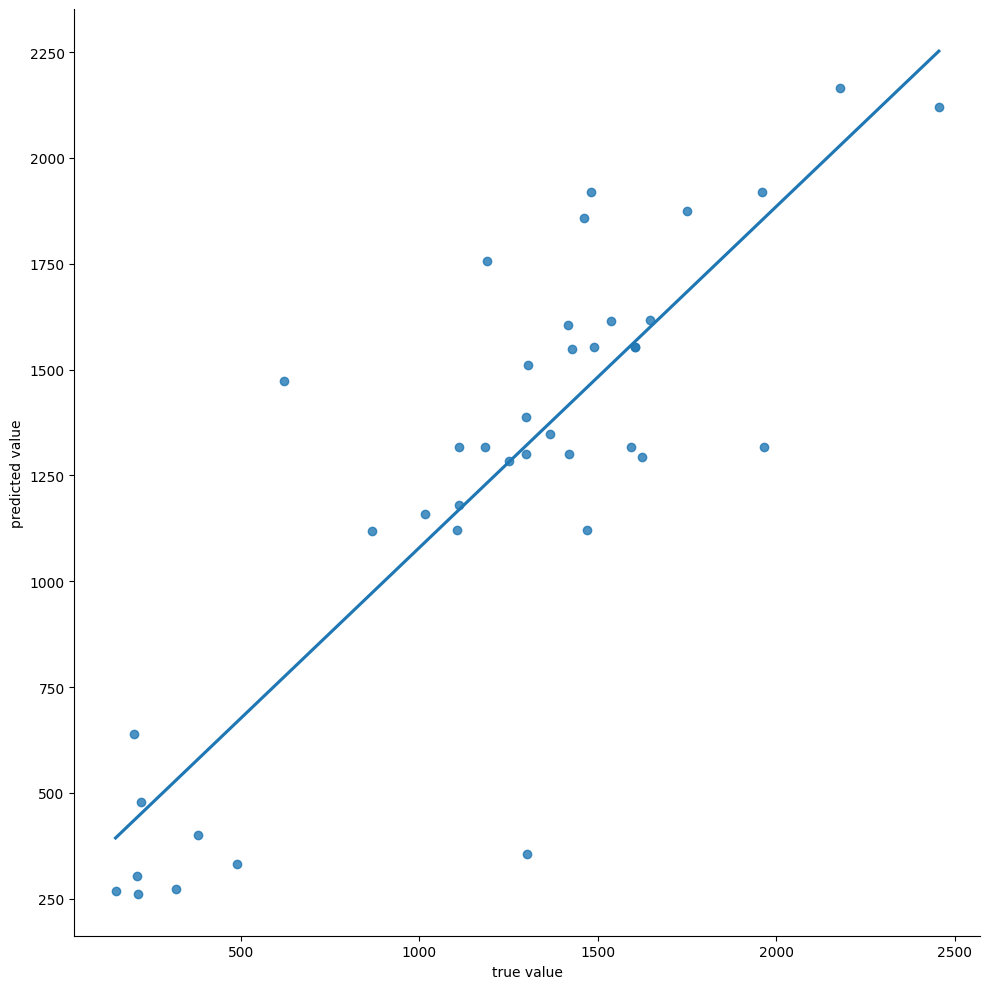

In [7]:
ax = sns.lmplot(x='true', y='predicted', data=data_as_df, height=10, ci=None)
ax.set(xlabel='true value', ylabel='predicted value')

ax

In [9]:
rgs.export('tpot_exported_pipeline.py')